# Laboratorium 4

### Konfiguracja

In [1]:
from defs2 import *
from definitions import *

<IPython.core.display.Javascript object>


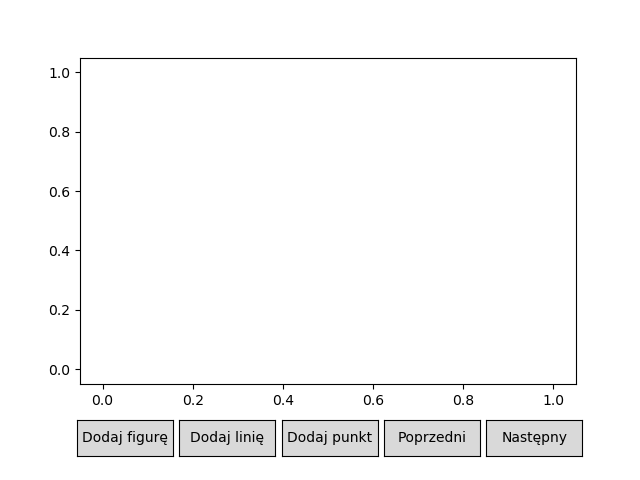

In [2]:
%matplotlib notebook
#Dodaj tu figury
plot1 = Plot()
plot1.draw()

In [29]:
save_plot(plot1, 'lchain.json')

## Rozwiązanie

In [13]:
file = 'lchain.json'
poly = load_poly(file)
lines = load_lines(file)

In [6]:
poly = get_poly(plot1)
lines = plot1.get_added_figure()[0]

### Sprawdzanie y-monotoniczności

In [4]:
def is_y_mon(poly):
    return not any(vert_type in (VertType.split, VertType.join) 
        for vert_type in (classify_point(a, b, c) for a, b, c in iter_3(poly)))

In [5]:
is_y_mon(poly)

True

### Klasyfikacja punktów

In [6]:
def classify_point(a, b, c): # a=prev, b=current, c=next
    # classifying point b
    orient = orientation(a, b, c)
    _, ay = a
    _, by = b
    _, cy = c
    
    if ay < by and cy < by: # początkowy, dzielący
        if orient == LEFT: return VertType.start
        elif orient == RIGHT: return VertType.split
        else: return VertType.regular
    elif ay > by and cy > by: # końcowy, łączący
        if orient == LEFT: return VertType.end
        elif orient == RIGHT: return VertType.join
        else: return VertType.regular
    else: return VertType.regular

In [7]:
def classify_all_points(poly):
    g = dict(zip(VertType, [[], [], [], [], []]))
    for a, b, c in iter_3(poly):
        cl = classify_point(a, b, c)
        g[cl].append(b)
    return [
        PointsCollection(values, color=key.value) 
        for (key, values) in g.items()
     ]

<IPython.core.display.Javascript object>


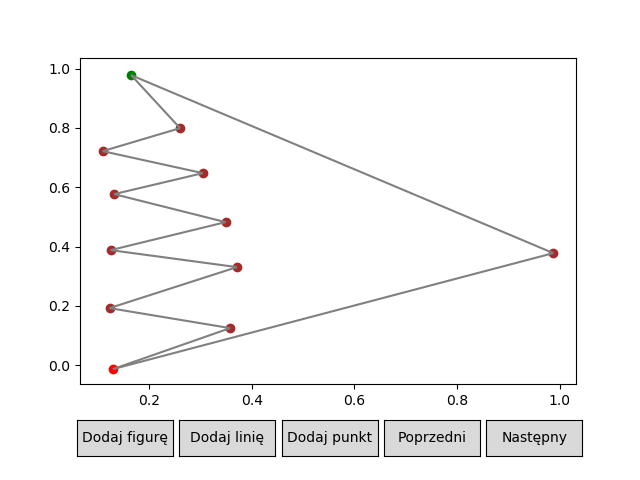

In [14]:
plot = Plot([Scene(classify_all_points(poly), [lines])])
plot.draw()

### Triangulacja wielokąta y-monotonicznego

In [9]:
def triangulate(poly, ax=1):
    left_chain, right_chain = find_chains(poly, ax)

    size = len(poly)
    vertices = list(sorted(range(size), key=lambda x: poly[x][ax], reverse=True))

    v0, v1, *vertices = vertices
    stack, triangles = deque([v0, v1]), []

    def connect_all(v):
        while len(stack) > 1:
            triangles.append((stack[0], stack[1], v))
            stack.popleft()
        stack.append(v)
    
    def connect_if(v, orient):
        top = stack.pop()
        while stack and orientation(poly[top], poly[v], poly[stack[-1]]) == orient:
            triangles.append((top, v, stack[-1]))
            top = stack.pop()
        stack.extend([top, v])

    for vert in vertices:
        top = stack[-1]
        if top in left_chain and vert in left_chain:
            connect_if(vert, LEFT)
        elif top in right_chain and vert in right_chain:
            connect_if(vert, RIGHT)
        else:
            connect_all(vert)
            
    return triangles

In [15]:
triangulate(poly) # indeksy wierzchołków przydatne do np gl_triangles

[(3, 4, 2),
 (5, 6, 4),
 (1, 2, 0),
 (2, 4, 0),
 (4, 6, 0),
 (6, 7, 0),
 (7, 0, 8),
 (8, 9, 0),
 (9, 10, 0),
 (0, 10, 11)]

<IPython.core.display.Javascript object>


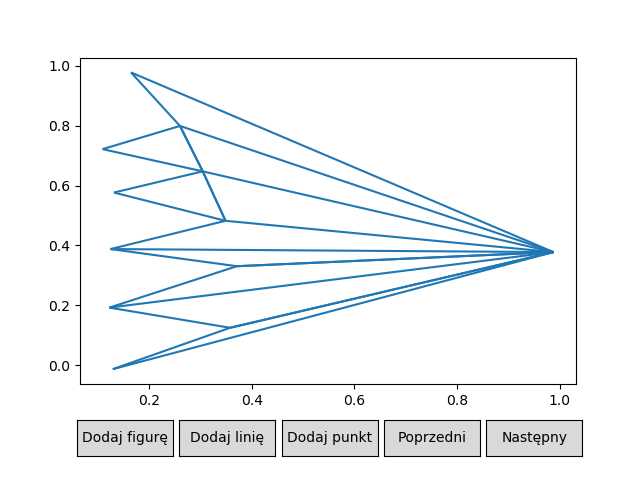

In [16]:
plot = Plot([Scene([], [ tr_to_line_col(poly, triangulate(poly)) ])])
plot.draw()

#### Wizualizacja

<IPython.core.display.Javascript object>


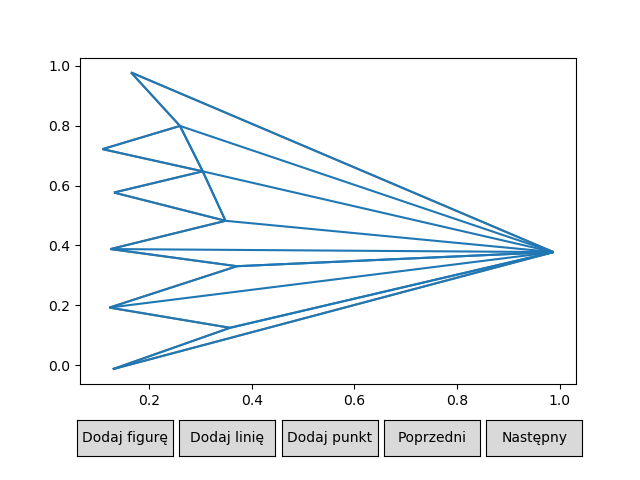

In [17]:
plot3 = Plot(list(triangulate_vis(poly, lines)))
plot3.draw()